# 例题: 非参数统计

12家连锁店数据:
星期二 456 207 139 246 177 212 195 170 184 163 225 236  
星期日 440 391 210 130 180 210 150 220 237 360 550 452  
圣诞节 320 840 430 340 200 300 130 180 156 240 780 630  
用什么方法可以回答圣诞节与周末间有关系吗?  

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import binom

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

%matplotlib inline

### 数据准备

In [2]:
data_of_weekday = np.array([456,207,139,246,177,212,195,170,184,163,225,236])
data_of_weekend = np.array([440,391,210,130,180,210,150,220,237,360,550,452])
data_of_holiday = np.array([320,840,430,340,200,300,130,180,156,240,780,630])

### 观察柱形图

(array([4., 1., 3., 0., 1., 0., 0., 1., 0., 2.]),
 array([130., 201., 272., 343., 414., 485., 556., 627., 698., 769., 840.]),
 <a list of 10 Patch objects>)

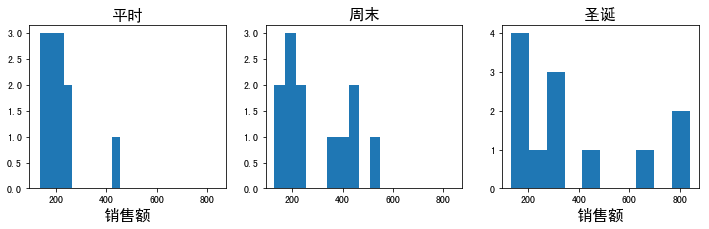

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), sharex=True)
ax1.set_title('平时', fontsize=16)
ax1.set_xlabel('销售额', fontsize=16)
ax2.set_title('周末', fontsize=16)
ax3.set_xlabel('销售额', fontsize=16)
ax3.set_title('圣诞', fontsize=16)
ax3.set_xlabel('销售额', fontsize=16)
ax1.hist(data_of_weekday)
ax2.hist(data_of_weekend)
ax3.hist(data_of_holiday)

肉眼看去都不符合正态分布的特征

### W正态性检验

In [4]:
(W1, P1) = shapiro(data_of_weekend)
(W2, P2) = shapiro(data_of_holiday)
print('周末: W值=', W1, ", P值=", P1)
print('圣诞: W值=', W2, ", P值=", P2)

周末: W值= 0.9029940366744995 , P值= 0.17337282001972198
圣诞: W值= 0.8573182225227356 , P值= 0.045254744589328766


圣诞销售数据计算出的P-Value = 0.045 < $\alpha$ = 0.05, 拒绝正态性的假设, 接受圣诞节销售数据分布不是正态分布的备择假设.

-------

### 符号检验

假设检验:  
&emsp; H0: 销售额(周末) $ = $  销售额(圣诞节)   
&emsp; H1: 销售额(周末) $ \neq $ 销售额(圣诞节)  

In [5]:
# 圣诞销售 大于 周末销售 的个数
s_1 = sum(data_of_holiday > data_of_weekend)
# 圣诞销售 小于 周末销售 的个数
s_2 = sum(data_of_holiday < data_of_weekend)
n = s_1 + s_2
if s_1 < n/2:
    C = -0.5
else:
    C = 0.5
print("数量(圣诞>周末) =", s_1, ", 数量(圣诞<周末) =", s_2, ", n =", n, ", C =", C)

数量(圣诞>周末) = 7 , 数量(圣诞<周末) = 5 , n = 12 , C = 0.5


$ Z = \dfrac{S^{+} - \dfrac{n}{2} + C}{\sqrt{\dfrac{n}{4}}} \overset{}{\rightarrow} N(0,1) $

代入公司得: Z = 0.866 < 1.96 ($\alpha = 0.05$) 不能拒绝H0, 说明不存在明显相关关系

--------

假设检验:  
&emsp; H0: $ 销售额(周末)_{75\%}  =   销售额(圣诞节)_{75\%} $   
&emsp; H1: $ 销售额(周末)_{75\%} \neq  销售额(圣诞节)_{75\%} $   

In [6]:
holiday_75 = np.percentile(data_of_holiday, 75)
P = 2 * binom.pmf(sum(data_of_weekend > holiday_75), 12, 0.75)
# P = 2 * binom.pmf(sum(data_of_weekend < holiday_75), 12, 0.25)
print("P = ", P)

P =  4.2915344238281114e-06


算出来P值 < $\alpha = 0.01$, 拒绝H0, 接受销售额在周末和圣诞节期间3/4的分位值是不相同的.